In [1]:
# Import Packages
import numpy as np
import scipy.stats as stats
import os
import pickle
import scipy.io as scio
from ncdump_python3 import ncdump
import pickle
import Area_Avg
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
from netCDF4 import Dataset
from ncdump_python3 import ncdump
mpl.rc('font',size=22)
mpl.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
mpl.rc('text', usetex=True)
plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
#Load in Dimensions
LLL = Dataset('LatLon.nc')
WACCM4_Lat = np.squeeze(LLL.variables['lat'])
WACCM4_Lon = np.squeeze(LLL.variables['lon'])
LLL.close()

In [3]:
#climate change responses
wAVD_dST = pickle.load(open(\
   "Future Projection CC Responses/wAVD_dST.pickle","rb"),encoding='latin1')
wAVD_dST_EM = np.mean(wAVD_dST, axis=(0,1))

RCP45_dST = pickle.load(open(\
   "Future Projection CC Responses/RCP45_dST.pickle","rb"),encoding='latin1')
RCP45_dST_EM = np.mean(RCP45_dST, axis=(0,1))

In [4]:
#modify longitude for basemap plotting
WACCM4_lon1 = WACCM4_Lon[1:73]
WACCM4_lon2 = WACCM4_Lon[72:144] - 360
WACCM4_Lon_new = np.hstack((WACCM4_lon2,WACCM4_lon1))

In [5]:
#define projection
xx, yy = np.meshgrid(WACCM4_Lon_new, WACCM4_Lat)
mm = Basemap(projection='hammer',lon_0=0,resolution='h')
x, y = mm(xx,yy) #converts rectangular meshgrid into meshgrid for the specific projection

In [6]:
#modify temperatures changes for basemap plotting
wAVD_dST_EM_1 = wAVD_dST_EM[:,1:73] 
wAVD_dST_EM_2 = wAVD_dST_EM[:,72:144]
wAVD_dST_EM_new = np.concatenate((wAVD_dST_EM_2,wAVD_dST_EM_1),\
                                axis=1)
RCP45_dST_EM_1 = RCP45_dST_EM[:,1:73] 
RCP45_dST_EM_2 = RCP45_dST_EM[:,72:144]
RCP45_dST_EM_new = np.concatenate((RCP45_dST_EM_2,RCP45_dST_EM_1),\
                                axis=1)

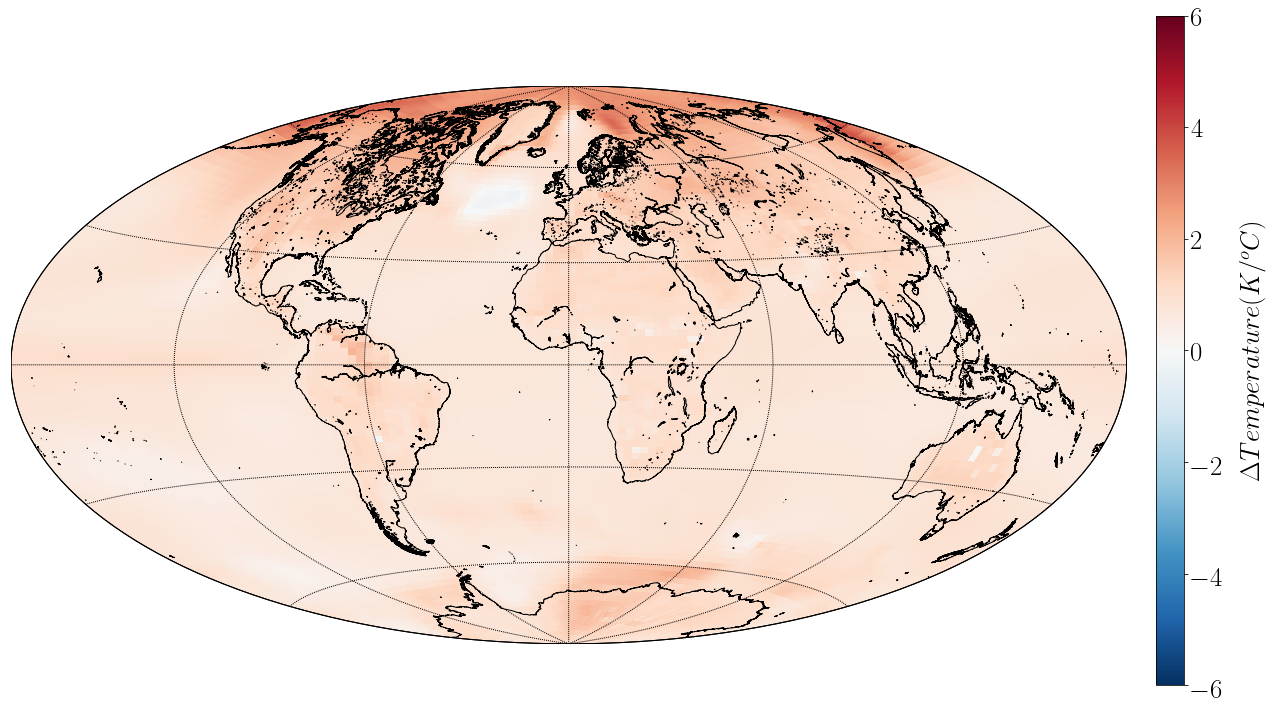

In [23]:
fig = plt.figure(figsize=(20,20))

mm.drawparallels(np.arange(-90.,120.,30.))
mm.drawmeridians(np.arange(0.,420.,60.));
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.pcolormesh(x,y, RCP45_dST_EM_new, cmap='RdBu_r')
#plt.title("$Representative$ $Concentration$ $Pathway$ $4.5$")
plt.clim(-6,6)

#add colorbar
fig.subplots_adjust(right=0.9)
cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
cbar = fig.colorbar(pc3,cbar_ax2)
cbar.set_label('$\Delta Temperature (K/^o C)$', fontsize=27, labelpad=15)
cbar.ax.tick_params(labelsize=27)
plt.clim(-6,6)

plt.savefig('RCP45_TS_Change.tiff',bbox_inches='tight',dpi=400)

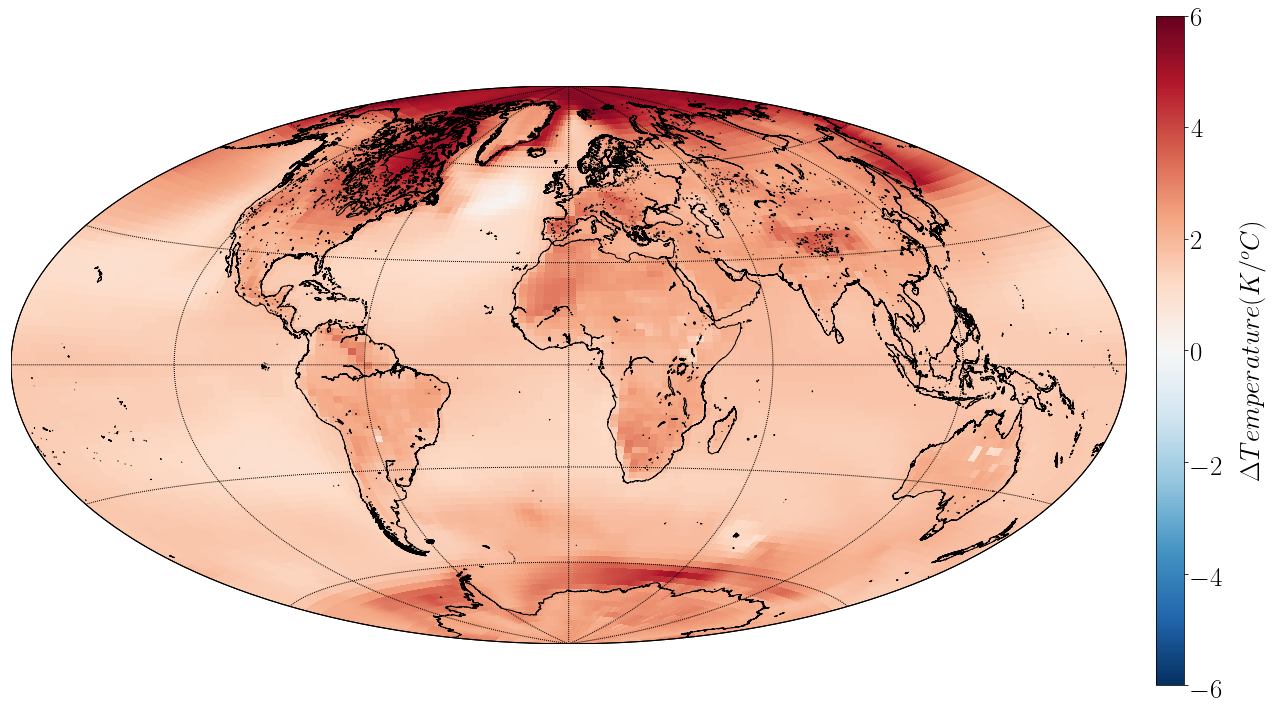

In [22]:
fig = plt.figure(figsize=(20,20))

mm.drawparallels(np.arange(-90.,120.,30.))
mm.drawmeridians(np.arange(0.,420.,60.));
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc3 = mm.pcolormesh(x,y, wAVD_dST_EM_new, cmap='RdBu_r')
#plt.title("$World$ $Avoided$")
plt.clim(-6,6)

#add colorbar
fig.subplots_adjust(right=0.9)
cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
cbar = fig.colorbar(pc3,cbar_ax2)
cbar.set_label('$\Delta Temperature (K/^o C)$', fontsize=27, labelpad=15)
cbar.ax.tick_params(labelsize=27)
plt.clim(-6,6)

plt.savefig('WAVD_TS_Change.tiff',bbox_inches='tight',dpi=400)